<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Naive Bayes Practice



---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

## Load the breast cancer data

In [7]:
load_breast_cancer().keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
data = load_breast_cancer()

In [24]:
X = data.data

In [25]:
y = data.target

In [32]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## Do a train-test split

In [27]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)


## Check the distribution of your features

This should inform you which Naive Bayes type you will need.

In [28]:
aaa = pd.DataFrame(X_train, y_train)

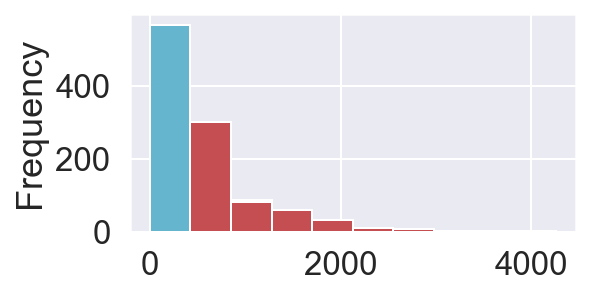

In [43]:
pd.DataFrame(X).plot(kind='hist', figsize=(4,2), legend=False)

## Fit a naive Bayes model

Which type might be appropriate?

In [34]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
print(cross_val_score(model, X_test, y_test, cv=5).mean())


0.9739130434782609


## Use the power transformer to obtain more normally distributed features

- [Scikit-Learn Power Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

In [3]:
from sklearn.preprocessing import PowerTransformer

## Fit the model on the transformed features